In [52]:
import os
from os.path import join as oj
import sys, time
sys.path.insert(1, oj(sys.path[0], '..'))  # insert parent path
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pmlb
from tqdm import tqdm
from copy import deepcopy
import pickle as pkl
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# get the outcome

In [56]:
outcome_pi = pd.read_csv('iaip_data/Datasets/form6b.csv')
outcome_surg = pd.read_csv('iaip_data/Datasets/form6c.csv')

In [57]:
outcome_pi.keys()

Index(['SubjectID', 'IAIinED1', 'Liver', 'CTGrade', 'Spleen', 'CTGrade2',
       'Kidney', 'CTGrade3', 'GITract', 'Mesenteric', 'SmallBowel',
       'LargeBowel', 'Pancreas', 'Gallbladder', 'FascialInjury',
       'AdrenalGland', 'UrinaryBladder', 'VascularStruct', 'HemoperitFluid',
       'OtherChecked', 'TOrgansOther', 'BldTransfusion', 'IVFluids',
       'ThoracicInjury1', 'Thoracotomy', 'PelvicFracture1', 'SurgicalRepair',
       'Other1'],
      dtype='object')

In [58]:
# Intra-abdominal injury diagnosed in the ED/during hospitalization by any diagnostic method
# 1 is yes
# 2 is no -> remap to 0
outcome_pi.keys()
outcome_pi['id'] = outcome_pi['SubjectID'] 
idxs = outcome_pi['IAIinED1'] == 2
outcome_pi[idxs] = 0
outcomes = outcome_pi[['id', 'IAIinED1']]

# make full data matrix

In [59]:
demographics = pd.read_csv('iaip_data/Datasets/demographics.csv')
demographics['id'] = demographics['SubjectID']

In [60]:
demographics.keys()

Index(['SubjectID', 'SEX', 'RACE', 'OTHER_RACE', 'HISPANIC_ETHNICITY',
       'ageinyrs', 'id'],
      dtype='object')

In [61]:
how = 'inner'
X_merged = pd.merge(demographics, outcomes, on='id', how=how)
X = pd.DataFrame()
for k in ['RACE', 'SEX']:
    X[k] = X_merged[k].astype(str)
for k in ['ageinyrs']:
    X[k] = X_merged[k].astype(float)

X_merged.keys()

Index(['SubjectID', 'SEX', 'RACE', 'OTHER_RACE', 'HISPANIC_ETHNICITY',
       'ageinyrs', 'id', 'IAIinED1'],
      dtype='object')

In [62]:
X_np = pd.get_dummies(X).values
y_np = X_merged['IAIinED1']

# prediction

In [63]:
m = DecisionTreeClassifier()

In [64]:
m.fit(X_np, y_np)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

[Text(167.4, 108.72, 'entropy = 0.0\nsamples = 761\nvalue = 761.0')]

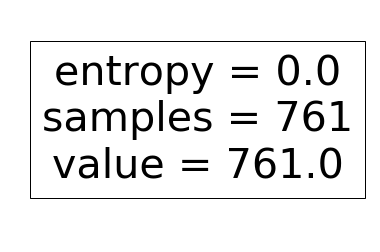

In [65]:
plot_tree(m)